# Examine Streamflow Data

In this Notebook, we will walk through a number of topics, including:

* Reading tabular data using a URL
* Creating a Spatially Enabled DataFrame
* Displaying point data on an ArcGIS Map Widget
* Adding layers from ArcGIS Online into the Map Widget

We will use a list of known observation gauge locations in a tabular format (CSV) and examine the tabular data as a table (DataFrame). Then, we will 'spatially enable' the data and examine the resulting features on an interactive map. Finally, we will enrich the data by bringing into the map additional data from the Esri Cloud (ArcGIS Online).

This notebook is an Esri Notebook, designed to be run in the ArcGIS Pro environment. Please do not open with Jupyter or Jupyter Lab. 

### Import libraries

The beginning of any script or Notebook will include importing Python modules (libraries) and functions that we will need in the following workflow.

In this Esri Notebook, we will import the following libraries:

* `sys` and `os` for operating system functions, such as finding or constructing a file path
* `arcpy` for accessing information about the current Map document (.aprx).
* Other libraries, and variables from the `00_environment_setup.ipynb` notebook that will be used throughout the training.

In [94]:
# Find the directory of the current project and add to PATH
import sys, os, arcpy
home_folder = arcpy.mp.ArcGISProject("current").homeFolder
sys.path.insert(0, home_folder)
os.chdir(home_folder)

# The 00_environment_setup notebook contains libraries and other things common to all the notebooks (e.g. file paths)
%run "00_environment_setup.ipynb"

Active Portal in ArcGIS Pro
Logged in as ksampson
Current conda environment:
	arcgispro-py3-clone C:\Users\ksampson\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone
Found input data directory: C:\Users\ksampson\Desktop\GloFAS_Q2Q_Bias_Correction_and_Verification\data\input
Completed importing and/or installing libraries in 4.19 seconds.


### Read file from URL

Read the CSV file from a URL to a `pandas` [DataFrame](https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe) object. A DataFrame is a 2 dimensional labeled data structure with columns of potentially different data types. This is commonly referred to as a data table. 

One of the most common methods of creating a DataFrame object is to read it from a text file. In this case, we will read a CSV file from an NCAR data server and create the table. Once the object is create, you can visualize a condensed view of the table in Jupyter by calling the ojbect

In [95]:
# Create a pandas DataFrame using a URL to a CSV file on a file server
station_details_URL = 'https://staff.ral.ucar.edu/hopson/GloFAS/Q2Qbiascorrection/glofas_stations_details.CSV'
df = pd.read_csv(station_details_URL)
df

,sta_name,sta_id,State Name,lon_cwc,lat_cwc,Basin,subbasin,Area [km^2]
0,a.b road x-ing,019-CDJAPR,Madhya Pradesh,77.111389,24.346667,Ganges,Chambal,5976.84
1,ahirwalia,003-mgd4ptn,Bihar,85.167222,26.367500,Ganges,LowerGanges,7722.13
2,aklera,017-CDJAPR,Rajasthan,76.603889,24.429722,Ganges,Chambal,6142.35
3,ankinghat,011-mgd2lkn,Uttar Pradesh,80.035643,26.934361,Ganges,MiddleGanges,82498.30
4,a.p. ghat,010-MBDGHY,Assam,92.803323,24.852918,Meghna,Meghna,19175.00
...,...,...,...,...,...,...,...,...
191,turtipar,012-MGD1LKN,Uttar Pradesh,83.880278,26.143611,Ganges,Ghagra,123504.00
192,tuting,002-ubddib,Arunachal Pradesh,94.905033,28.990250,Brahmaputra,UpperBrahmaputra-Nyang,242026.00
193,uskabazar,013-MGD1LKN,Uttar Pradesh,83.125833,27.189722,Ganges,Ghagra,2974.78
194,uttarkashi,008-HGDDDN,Uttarakhand,78.356389,30.738889,Ganges,UpperGanges,4652.96


### Convert table (DataFrame) to Spatially-Enabled DataFrame (SEDF)

#### Spatially Enabled Data Frames

A powerful feature that the `arcgis` library introduces is the [`Spatially Enabled Data Frame`](https://developers.arcgis.com/python/guide/introduction-to-the-spatially-enabled-dataframe/).  This adds geospatial functionality to the standard Pandas `DataFrame` object.

Loading data into a spatially enabled dataframe is fairly simple.  For example, the `from_xy` function that is available in the spatial extension added by `arcgis` to the pandas `DataFrame` object can be used to load data directly from a pandas `DataFrame` object. In this case, the SEDF is created below directly from the existing pandas DataFrame object by calling `spatial.from_xy` and defining the columns that represent the coordinate data, and providing a coordinte system definition.

More information on spatially-enabled dataframes:
   
1.   [Reading data into SEDFs](https://developers.arcgis.com/python/guide/part2-data-io-reading-data/)
   
2.   [Visualizing Data in SEDFs](https://developers.arcgis.com/python/guide/visualizing-data-with-the-spatially-enabled-dataframe/)
   
3.   [SEDF Advanced Topics](https://developers.arcgis.com/python/guide/spatially-enabled-dataframe-advanced-topics/)
   

In [96]:
# Create a spatially enabled data frame
sedf = pd.DataFrame.spatial.from_xy(df=df, x_column='lon_cwc', y_column='lat_cwc', sr=4326)

# Check head for SHAPE column
sedf.head()

,sta_name,sta_id,State Name,lon_cwc,lat_cwc,Basin,subbasin,Area [km^2],SHAPE
0,a.b road x-ing,019-CDJAPR,Madhya Pradesh,77.111389,24.346667,Ganges,Chambal,5976.84,"{""spatialReference"": {""wkid"": 4326}, ""x"": 77.1..."
1,ahirwalia,003-mgd4ptn,Bihar,85.167222,26.367500,Ganges,LowerGanges,7722.13,"{""spatialReference"": {""wkid"": 4326}, ""x"": 85.1..."
2,aklera,017-CDJAPR,Rajasthan,76.603889,24.429722,Ganges,Chambal,6142.35,"{""spatialReference"": {""wkid"": 4326}, ""x"": 76.6..."
3,ankinghat,011-mgd2lkn,Uttar Pradesh,80.035643,26.934361,Ganges,MiddleGanges,82498.30,"{""spatialReference"": {""wkid"": 4326}, ""x"": 80.0..."
4,a.p. ghat,010-MBDGHY,Assam,92.803323,24.852918,Meghna,Meghna,19175.00,"{""spatialReference"": {""wkid"": 4326}, ""x"": 92.8..."


Once in memory, the spatially enabled data frame includes all of the capabilities of a regular Pandas `DataFrame` object for working with tabular data.  It also includes an additional `SHAPE` column that describes the geometry associated with each record in the table, and enables the data frame to be used with a variety of spatial functions provided by the `arcgis` libary.

For example, addtional spatial functionality for spatially enabled `DataFrame` objects can be accessed through the `spatial` property. To preview the various spatial functions available with a spatially enabled data frame object, place the cursor at the end of the line of code in the next cell, and press the `Tab` key:

In [97]:
sedf.spatial.

SyntaxError: invalid syntax (<string>, line 1)

Depending on what other Python modules you need to use in your analysis, you may need to manipulate or prepare your data in different ways.  For example, you may need to represent your data as a simple text representation of GeoJSON.  Do do this, you can execute the following two lines to convert the spatially enabled data frame to a `FeatureSet` object (from the `arcgis.features` module).  A `FeatureSet` object provides a property that converts its contents to GeoJSON text format:

In [ ]:
station_fset = sedf.spatial.to_featureset()
station_json = station_fset.to_geojson

In [ ]:
station_fset

Some of the capabilities for working with spatially enabled data frame objects will be explored in more detail one of the later notebooks of this tutorial.

#### Exporting GIS datasets

When you are finished performing analysis in your notebook, you will likely want to save your results to datasets that can be used in other contexts, or shared to others.

For example, to save your data to a new feature class in your local filesystem, you can easily excute the `to_featureclass` function.

Alternatively, you can publish your data directly to your ArcgGIS Online or ArcGIS Enterprise content as a new feature layer, enabling you to use it in ArcGIS web maps, story maps, dashboards, etc.:

In [ ]:
feature_layer = sedf.spatial.to_featurelayer("analysis_locations")

In [ ]:
feature_layer

### Create a map widget for displaying station locations

One advantage of using SEDFs is the ability to plot the data in an interactive [map widget](https://developers.arcgis.com/python/guide/using-the-map-widget/). This can be a handy way of viewing the data. If you click a feature on the map, you will get a popup of the data for that fature (row) from the other fields in the SEDF.

The map widget can be configured for a particular area, zoom level, size on the page, and can be centered on a point. Here, we will set the center of the map widget to the centroid of the spatial extent of the data in the SEDF. 

In [ ]:
# Get bounding box and calculate centroid
sedf_geoextent_geom = sedf.spatial.bbox
centroid = sedf_geoextent_geom.centroid

In [ ]:
# Passing a place name to the constructor will initialize the extent of the map.
m1 = gis.map('India', zoomlevel=6)

# Change the size of the map widget
m1.layout = Layout(flex='1 1', padding='0px', height='600px')

# Plot the SEDF on the map
sedf.spatial.plot(map_widget=m1)

# Zoom to the layer
m1.zoom_to_layer(sedf)

# Specify map center point. Must reverse coordinate order here
m1.center = centroid[::-1]     

# Plot the map
m1

Click on some of the points in the map widget to see the data available from the DataFrame.

### Add useful layers to the map from ArcGIS Online

We will create the same map widget as before, but add a [layer](https://www.arcgis.com/home/item.html?id=9f86716d941c4410b0b406d911754b2c) from ArcGIS Online.

Other customizations you may wish to make could be the basemap drawn under your data on the map widget. You can find a list of available basemaps by calling the `gis.map().basemaps` function.

In [98]:
# Add world hydro reference overlay: 
item = gis.content.get("9f86716d941c4410b0b406d911754b2c")  # World Hydro Reference Overlay
print(item.layers)

[<MapFeatureLayer url:"https://tiles.arcgis.com/tiles/P3ePLMYs2RVChkJx/arcgis/rest/services/Esri_Hydro_Reference_Overlay/MapServer/0">]


In [99]:
# Passing a place name to the constructor will initialize the extent of the map.
m2 = gis.map('India', zoomlevel=12)

m2.add_layer(item.layers[0])

# Change the size of the map widget
m2.layout = Layout(flex='1 1', padding='0px', height='600px')

# Specify map center point. Must reverse coordinate order here    
m2.center = [18.4571,73.7870] # here we are setting the map's center to NWA

# Plot the map
m2

MapView(layout=Layout(flex='1 1', height='600px', padding='0px'))

### You can use the ArcGIS API for Python to search for content in ArcGIS Online using the `.content.search` function

There is a powerful [search](https://developers.arcgis.com/python/guide/accessing-and-creating-content/) function that can be used to find data. 

First, you can search using a string. This will default to searching your ArcGIS Online Organization. Set `outside_org=True` to search all of ArcGIS Online.

In [100]:
search_items = gis.content.search("GEOGLOWS", outside_org=True)
for search_item in search_items:
    print(search_item)

<Item title:"GEOGloWS ECMWF Streamflow System (6 Day Forecast)" type:Map Image Layer owner:esri>
<Item title:"GeoGlows" type:Web Mapping Application owner:906717_rhdhv>
<Item title:"testpdf" type:PDF owner:vsheth_amerigeoss>
<Item title:"GEO Global Water Sustainability (GEOGLOWS)" type:Document Link owner:rich_amerigeoss>
<Item title:"Historical Validation Tool Colombia" type:Web Mapping Application owner:annelisemcapener_amerigeoss>
<Item title:"Global Stream Flow Web Map-Copy" type:Web Map owner:GEOG1301_Group9>
<Item title:"Nepal - Data Validation" type:Web Map owner:spence97>
<Item title:"Stream Flow with Stream Gauges" type:Web Map owner:Easy2BGreen>
<Item title:"Water Quality" type:Hub Page owner:BakalDagnachew_amerigeoss>
<Item title:"GEOGLOWS Partners" type:Hub Page owner:rich_amerigeoss>


Next, you can display one or more search results in the cell output, which will render a card with information and links to the URL for the service.

<Item title:"GEOGloWS ECMWF Streamflow System (6 Day Forecast)" type:Map Image Layer owner:esri>
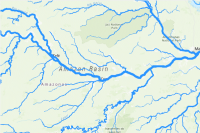

In [101]:
display(search_items[0])

You can obtain the ID for the item from the search result and store the item number as a variable or obtain the item directly using the item's ArcGIS Online ID using the `.get` method.

Item ID: 5c2e6d2137bb4d2187db387979db2f31


<Item title:"GEOGloWS ECMWF Streamflow System (6 Day Forecast)" type:Map Image Layer owner:esri>
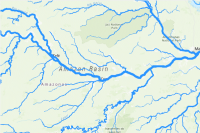

In [102]:
# Obtain ID for the desired Layer from search results
known_item_id = search_items[0].id                     # Request ID from search results. "5c2e6d2137bb4d2187db387979db2f31"
print('Item ID: {0}'.format(known_item_id))

# lets use the get() to access this item
online_item = gis.content.get(known_item_id)
online_item

Users may also call the URL dircely as input to a function that will construct a `FeauteLayerCollection`

In [103]:
from arcgis.features import FeatureLayerCollection

# URL for the ArcGIS Feature Service of GeoGLOWs data
geoglows_url = r'https://livefeeds2.arcgis.com/arcgis/rest/services/GEOGLOWS/GlobalWaterModel_Medium/MapServer'
geoglows = FeatureLayerCollection(geoglows_url)

# Get Layer names from feature layer collection
geoglows_layer_names = [layer.properties.name for layer in geoglows.layers]
print("Layer Names in Feature Layer Collection: {0}".format(geoglows_layer_names))

# Print URL for Feature Layer
geoglows.layers[0]

Layer Names in Feature Layer Collection: ['Flow Forecast (m³/sec)']


<FeatureLayer url:"https://livefeeds2.arcgis.com/arcgis/rest/services/GEOGLOWS/GlobalWaterModel_Medium/MapServer/0">

In [104]:
# Passing a place name to the constructor will initialize the extent of the map.
m3 = gis.map('India', zoomlevel=12)
    
# Add layer if it returns a valid HTTP code
if gis.content.check_url(geoglows_url)['httpStatusCode']==200:
    m3.add_layer(geoglows.layers[0])
    
# Change the size of the map widget. Limit the size to get the feature layer to draw some features quickly.
m3.layout = Layout(flex='1 1', padding='0px', height='400px', width='800px')

# Specify map center point. Must reverse coordinate order here
m3.center = [18.4571,73.7870] # here we are setting the map's center to NWA

# Set a particular basemap
m3.basemap = 'gray-vector'

# Plot the map
m3

MapView(layout=Layout(flex='1 1', height='400px', padding='0px', width='800px'))

### Add layers to a map within ArcGIS Pro

You may want to add a layer from ArcGIS Online or another GIS Feature Service to your ArcGIS Pro active map session. To accomplish this, instead of creating a map widget, we will add the layer into one of our ArcGIS Pro maps.

In order to do this, we will use the `MakeFeatureLayer_management` tool in `arcpy`, which is a geosprocessing tool and automatically adds the results as a layer in the active map. However, we will want to make sure 
to add this map to a specific map in our ArcGIS Pro project. The code below will make a feature layer using the URL of the GeoGLOWS feature service, and then if it does not already exist in the GeoGLOWS map in 
this ArcGIS Pro session, it will add the layer using the ArcGIS API for Python `addLayer` syntax.

NOTE: To make sure that the GeoGLOWS map is the active map in ArcGIS Pro, click on the GeoGLOWS map tab and then return to this notebook before executing the next cell.

In [105]:
# Add the Feautre Service as a layer to the current map view
from arcgis.features import FeatureLayer

# To add the layer to the map, we must first make a feature layer
arcpy.MakeFeatureLayer_management(geoglows.layers[0].url, geoglows_layer_names[0])

# Get a list of map layers for the GeoGLOWS map
m = aprx.listMaps("GeoGLOWS")[0]
map_layer_names = [layer.name for layer in m.listLayers()]

if geoglows_layer_names[0] not in map_layer_names:
    
    # Add the already-existing layer to the current map view
    m.addLayer(FeatureLayer(geoglows_layer_names[0], "TOP"))

Now, we will pull in a layer of reservoirs from a known ArcGIS Online location.

<Item title:"India: National Register of Large Dams 2019 (Polygon)" type:Feature Layer Collection owner:esri_IN_content>
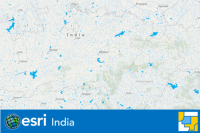

In [106]:
# India Reservoirs layer ID in Living Atlas
CWC_Reservoirs = "34b71f5ea24b49ce857e8ee5e71a4117"
item = gis.content.get(CWC_Reservoirs)
item

In [107]:
# Add the Feautre Layer Collection as a layer to the current map view
cwc_res_layer_names = [layer.properties.name for layer in item.layers]

# To add the layer to the map, we must first make a feature layer
arcpy.MakeFeatureLayer_management(item.url, cwc_res_layer_names[0])

# Get a list of map layers for the GeoGLOWS map
m = aprx.listMaps("GeoGLOWS")[0]
map_layer_names = [layer.name for layer in m.listLayers()]

if cwc_res_layer_names[0] not in map_layer_names:
    
    # Add the already-existing layer to the current map view
    m.addLayer(FeatureLayer(cwc_res_layer_names[0], "TOP"))

### Examine the feature service in ArcGIS Pro

You have added the GeoGLOWS forecast layer into your GEOWloWS map within ArcGIS Pro. This is a streafmlow forecast and is time-enabled. 

Click on the GEOGloWS map window and explore this data before saving the map document and moving to the next lesson.

In [108]:
aprx.save()

### Reset the namespace

The following `%reset -f` command is a built-in command in Jupyter Notebook that will reset the namespace. This is good practice to run when you are finished with the notebook.

In [ ]:
%reset -f

# Next up - Introduction to ArcGIS Notebooks

This concludes Lesson **N2 - Visualize Station Data**. In the next lesson, we will learn more about using Python and ArcGIS Notebooks.

**IT IS BEST TO EITHER SHUTDOWN THIS LESSON OR CLOSE IT BEFORE PROCEEDING TO THE NEXT LESSON TO AVOID POSSIBLY EXCEEDING ALLOCATED MEMORY. Select `Command Pallette -> restart kernel`.**

© UCAR 2023